In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_val_results(path):
    results = []
    with open(path) as text:
        for line in text:
            if 'val_acc1' in line:
                i = line.index(':', -25)
                results.append(float(line[i+2:-2]))
    return results

In [3]:
#get validation accuracy from text
#results from random seed 29 -b 256 --lr 0.00001 --epochs 50 datasplit 9:1
L3eidiv_rs29 = get_val_results('./rs29/L3_eidiv_rs29.txt')
L5eidiv_rs29 = get_val_results('./rs29/L5_eidiv_rs29.txt')
L7eidiv_rs29 = get_val_results('./rs29/L7_eidiv_rs29.txt')
L3_rs29 = get_val_results('./rs29/L3_rs29.txt')
L5_rs29 = get_val_results('./rs29/L5_rs29.txt')
L7_rs29 = get_val_results('./rs29/L7_rs29.txt')

#results from random seed 53 -b 256 --lr 0.000005 --epochs 50 datasplit 8:2
#L3eidiv_rs53 = get_val_results('./rs53/L3_eidiv_rs53.txt')
#L5eidiv_rs53 = get_val_results('./rs53/L5_eidiv_rs53.txt')
#L7eidiv_rs53 = get_val_results('./rs53/L7_eidiv_rs53.txt')
#L3_rs53 = get_val_results('./rs53/L3_rs53.txt')
#L5_rs53 = get_val_results('./rs53/L5_rs53.txt')
#L7_rs53 = get_val_results('./rs53/L7_rs53.txt')

#results from random seed 77 -b 256 --lr 0.000005 --epochs 50 datasplit 8:2
L3eidiv_rs77 = get_val_results('./rs77/3Leidiv_rs77.txt')
L7eidiv_rs77_1_5 = get_val_results('./rs77/7Leidiv_rs77_1_5.txt')
L7eidiv_rs77_5_6 = get_val_results('./rs77/7Leidiv_rs77_5_6.txt')
L7_rs77 = get_val_results('./rs77/7L_rs77.txt')

#results from random seed 104 -b 256 --lr 0.000005 --epochs 50 datasplit 8:2

#validation results from random seed 53 -b 256 --epochs 50 datasplit 8:2 for finding the best lr
L7eidiv_rs53_00001 = get_val_results('./val_L7eidiv/lr0.00001.txt')
L7eidiv_rs53_00003 = get_val_results('./val_L7eidiv/lr0.00003.txt')
L7eidiv_rs53_00005 = get_val_results('./val_L7eidiv/lr0.00005.txt')
L7eidiv_rs53_000001 = get_val_results('./val_L7eidiv/lr0.000001.txt')
L7eidiv_rs53_000005 = get_val_results('./val_L7eidiv/lr0.000005.txt')
L7eidiv_rs53_000008 = get_val_results('./val_L7eidiv/lr0.000008.txt')
L7eidiv_rs53_000015 = get_val_results('./val_L7eidiv/lr0.000015.txt')

#validation results from -b 256 --epochs 90 datasplit 8:2 for finding the best lr
L7eidiv_rs53_001_e90 = get_val_results('./val_L7eidiv_epochs90_nolradj/lr0.001_rs53.txt')
L7eidiv_rs53_0001_e90 = get_val_results('./val_L7eidiv_epochs90_nolradj/lr0.0001_rs53.txt')
L7eidiv_rs53_00001_e90 = get_val_results('./val_L7eidiv_epochs90_nolradj/lr0.00001_rs53.txt')
L7eidiv_rs77_00001_e90 = get_val_results('./val_L7eidiv_epochs90_nolradj/lr0.00001_rs77.txt')

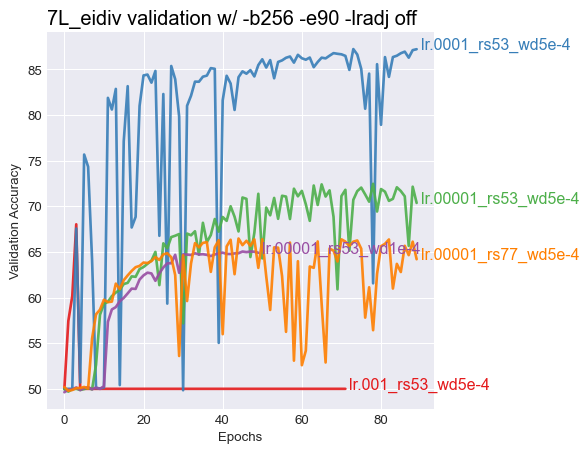

In [4]:
acc_list = np.array([L7eidiv_rs53_001_e90, L7eidiv_rs53_0001_e90, L7eidiv_rs53_00001_e90, L7eidiv_rs53_00001, 
                        L7eidiv_rs77_00001_e90], dtype=object)
name_list = np.array(['lr.001_rs53_wd5e-4', 'lr.0001_rs53_wd5e-4', 'lr.00001_rs53_wd5e-4', 'lr.00001_rs53_wd1e-4', 
                    'lr.00001_rs77_wd5e-4'])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(500/dpi, 500/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')

for i in range(len(acc_list)):
    plt.plot(acc_list[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
    plt.text(len(acc_list[i]), acc_list[i][-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

plt.title("7L_eidiv validation w/ -b256 -e90 -lradj off", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

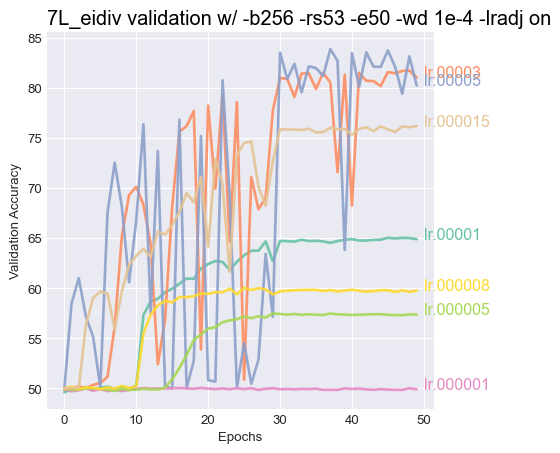

In [4]:
acc_list = np.array([L7eidiv_rs53_00001, L7eidiv_rs53_00003, L7eidiv_rs53_00005, L7eidiv_rs53_000001, 
                    L7eidiv_rs53_000005, L7eidiv_rs53_000008, L7eidiv_rs53_000015,], dtype=object)
name_list = np.array(['lr.00001', 'lr.00003', 'lr.00005', 'lr.000001', 'lr.000005', 'lr.000008', 'lr.000015'])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(500/dpi, 500/dpi), dpi=dpi)
palette = plt.get_cmap('Set2')

for i in range(len(acc_list)):
    plt.plot(acc_list[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
    plt.text(len(acc_list[i]), acc_list[i][-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

plt.title("7L_eidiv validation w/ -b256 -rs53 -e50 -wd 1e-4 -lradj on", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [ ]:
name_list = np.array(['3Leidiv', '5Leidiv', '7Leidiv', '3L', '5L', '7L'])
lines = np.array([np.asarray(L3eidiv_rs29), np.asarray(L5eidiv_rs29), np.asarray(L7eidiv_rs29), 
                np.asarray(L3_rs29), np.asarray(L5_rs29), np.asarray(L7_rs29)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(600/dpi, 600/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(50, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title('Performance Comparison rs29', loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [ ]:
name_list = np.array(['7Leidiv_rs77'])
lines = np.array([np.asarray(L7eidiv_rs77_1_5)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(300/dpi, 300/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(27, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("7L EIDivnorm w/ lr 0.00001", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [ ]:
L7eidiv_rs77 = get_val_results('./rs77/7Leidiv_rs77_5_6.txt')

name_list = np.array(['7Leidiv_rs77'])
lines = np.array([np.asarray(L7eidiv_rs77)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(300/dpi, 300/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(12, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("7L EIDivnorm w/ lr 0.000005", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [ ]:
L7eidiv_rs77 = get_val_results('./rs77/7Leidiv_rs77_7_6.txt')

name_list = np.array(['7Leidiv_rs77'])
lines = np.array([np.asarray(L7eidiv_rs77)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(300/dpi, 300/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(12, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("7L EIDivnorm w/ lr 0.000007", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [ ]:
name_list = np.array(['3Leidiv_29', '3Leidiv_77'])
lines = np.array([np.asarray(L3eidiv_rs29), np.asarray(L3eidiv_rs77)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(300/dpi, 300/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(50, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("3L w/ eidiv lr 0.00001", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [ ]:
name_list = np.array(['7L_rs29', '7L_rs77', '3L_rs29', '5L_rs29', '7L_rs29'])
lines = np.array([np.asarray(L7_rs29), np.asarray(L7_rs77), np.asarray(L3_rs29), np.asarray(L5_rs29), np.asarray(L7_rs29)])

#setup plot
plt.style.use('seaborn-darkgrid')
dpi = 96
plt.figure(figsize=(400/dpi, 400/dpi), dpi=dpi)
palette = plt.get_cmap('Set1')
#draw lines
for i in range(lines.shape[0]):
    plt.plot(lines[i], marker='', color=palette(i), linewidth=2, alpha=0.9, label=name_list[i])
#mark lines
for i in range(lines.shape[0]):
    plt.text(50, lines[i,-1], name_list[i], horizontalalignment='left', size='large', color=palette(i))

#plt.legend(loc=2, ncol=2)
plt.title("w/o eidiv lr 0.00001", loc='left', fontsize=15, fontweight=0, color='black')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()